In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
# Function to split strings into a list and remove empty strings
def split_to_list(cell):
    return [item.strip() for part in cell.split(',') for item in part.split('\n') if item.strip()]


In [3]:
df_all = pd.read_excel('PED_all_exp_entries.xlsx')
# create a custom header for easily programme handling
headers = ['ped_id', 'number_of_chains', 'protein_name', 'length_in_ped', 'uniprot_acc', 'length_in_uniprot', 'disorder_region_from_mobi', 'pdb_region','length_of_idr', 'class','exp_method','number_of_entangled_frames','total_frames', 'note'] 
# assign custom header to DataFrame
df_all.columns = headers
df = df_all[~df_all['class'].isin(['Not Classified', 'Fully Structured'])]
df

,ped_id,number_of_chains,protein_name,length_in_ped,uniprot_acc,length_in_uniprot,disorder_region_from_mobi,pdb_region,length_of_idr,class,exp_method,number_of_entangled_frames,total_frames,note
0,PED00001,1.0,Protein SIC1,92.0,P38634,284,"([1, 231], [261, 284])","[1, 90]","[90, 0]",Fully IDP,NMR,4.0,32.0,NaN
1,PED00002_A,NaN,Heat shock protein beta-6,104.0,O14558,160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
2,PED00002_B,NaN,Heat shock protein beta-6,104.0,O14558,160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
3,PED00003,1.0,Beta-synuclein,134.0,Q16143,134,"([1, 134],)","(1, 134)",[134],Fully IDP,NMR,46.0,575.0,NaN
4,PED00004,1.0,Cyclin-dependent kinase inhibitor 1B,69.0,O43806,158,"([1, 158],)","(25, 93)",[69],Fully IDP,NMR,0.0,130.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,PED00419_A,NaN,SH3 domain-containing kinase-binding protein 1,75.0,Q96B97,665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
515,PED00419_B,NaN,SH3 domain-containing kinase-binding protein 1,75.0,Q96B97,665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
516,PED00419_C,NaN,SH3 domain-containing kinase-binding protein 1,75.0,Q96B97,665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
519,PED00421,1.0,FXYD2,64.0,P54710-2,64,[ID does not exist in Database],NaN,NaN,Fully IDP,NMR,0.0,10.0,manually assigned


In [4]:
# create categories and filter out from original data
fully_IDP = df[df['class']=='Fully IDP']
long_IDR = df[df['class']=='Long IDR']
short_IDR = df[df['class']=='Short IDR']
fully_structure = df[df['class']=='Fully Structured']
not_classified = df[df['class']=='Not Classified']

In [5]:
df['uniprot_acc'] = df['uniprot_acc'].apply(split_to_list)
df

/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykernel_9088/1383348510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['uniprot_acc'] = df['uniprot_acc'].apply(split_to_list)


,ped_id,number_of_chains,protein_name,length_in_ped,uniprot_acc,length_in_uniprot,disorder_region_from_mobi,pdb_region,length_of_idr,class,exp_method,number_of_entangled_frames,total_frames,note
0,PED00001,1.0,Protein SIC1,92.0,[P38634],284,"([1, 231], [261, 284])","[1, 90]","[90, 0]",Fully IDP,NMR,4.0,32.0,NaN
1,PED00002_A,NaN,Heat shock protein beta-6,104.0,[O14558],160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
2,PED00002_B,NaN,Heat shock protein beta-6,104.0,[O14558],160,"([1, 68], [150, 160])","(57, 160)","[12, 11]",Short IDR,SAXS,0.0,5.0,NaN
3,PED00003,1.0,Beta-synuclein,134.0,[Q16143],134,"([1, 134],)","(1, 134)",[134],Fully IDP,NMR,46.0,575.0,NaN
4,PED00004,1.0,Cyclin-dependent kinase inhibitor 1B,69.0,[O43806],158,"([1, 158],)","(25, 93)",[69],Fully IDP,NMR,0.0,130.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,PED00419_A,NaN,SH3 domain-containing kinase-binding protein 1,75.0,[Q96B97],665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
515,PED00419_B,NaN,SH3 domain-containing kinase-binding protein 1,75.0,[Q96B97],665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
516,PED00419_C,NaN,SH3 domain-containing kinase-binding protein 1,75.0,[Q96B97],665,"([59, 91], [167, 261], [334, 604])","(594, 665)","[0, 0, 11]",Short IDR,NMR,0.0,30.0,NaN
519,PED00421,1.0,FXYD2,64.0,[P54710-2],64,[ID does not exist in Database],NaN,NaN,Fully IDP,NMR,0.0,10.0,manually assigned


# Counting statistic

In [6]:
# create categories and filter out from original data
fully_IDP = df[df['class']=='Fully IDP']
long_IDR = df[df['class']=='Long IDR']
short_IDR = df[df['class']=='Short IDR']
fully_structure = df[df['class']=='Fully Structured']
not_classified = df[df['class']=='Not Classified']

# count how many entries in each category
print(f"There are {len(df)} in this Database")
print(f"There are {len(fully_structure)} that are fully structured")
print(f"There are {len(fully_IDP)} that are fully IDP")
print(f"There are {len(long_IDR)} that are Long IDR")
print(f"There are {len(short_IDR)} that are Short IDR")
print(f"There are {len(not_classified)} that are not classified")


There are 416 in this Database
There are 0 that are fully structured
There are 77 that are fully IDP
There are 191 that are Long IDR
There are 148 that are Short IDR
There are 0 that are not classified


In [7]:
# Number of unique
list_of_uniprot = [item for uniprots in df['uniprot_acc'] for item in uniprots]
print(len(set(list_of_uniprot)))

248


In [8]:
# Count how many entries with at least one entangled conformations
print("Number of entries with at least 1 entangled conformation:")
print(f"Fully IDP: {len(fully_IDP[fully_IDP['number_of_entangled_frames']>0])}")
print(f"Long IDR: {len(long_IDR[long_IDR['number_of_entangled_frames']>0])}")
print(f"short IDR: {len(short_IDR[short_IDR['number_of_entangled_frames']>0])}")

Number of entries with at least 1 entangled conformation:
Fully IDP: 40
Long IDR: 111
short IDR: 48


# compile data for plot

In [9]:
# Full IDP
fully_IDP['entangled_population'] = fully_IDP['number_of_entangled_frames']/fully_IDP['total_frames']
fully_IDP_sorted = fully_IDP.sort_values(by='entangled_population', ascending=False)
# Reset the index and drop the old index
fully_IDP_sorted = fully_IDP_sorted.reset_index(drop=True)

# Long IDR
long_IDR['entangled_population'] = long_IDR['number_of_entangled_frames']/long_IDR['total_frames']
long_IDR_sorted = long_IDR.sort_values(by='entangled_population', ascending=False)
long_IDR_sorted = long_IDR_sorted.reset_index(drop=True)

# Short IDR
short_IDR['entangled_population'] = short_IDR['number_of_entangled_frames']/short_IDR['total_frames']
short_IDR_sorted = short_IDR.sort_values(by='entangled_population', ascending=False)
short_IDR_sorted = short_IDR_sorted.reset_index(drop=True)

/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykernel_9088/1494868484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_IDP['entangled_population'] = fully_IDP['number_of_entangled_frames']/fully_IDP['total_frames']
/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykernel_9088/1494868484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_IDR['entangled_population'] = long_IDR['number_of_entangled_frames']/long_IDR['total_frames']
/var/folders/1f/m8_t8g414dz2d33zlncf3gv40000gn/T/ipykerne

<IPython.core.display.Javascript object>


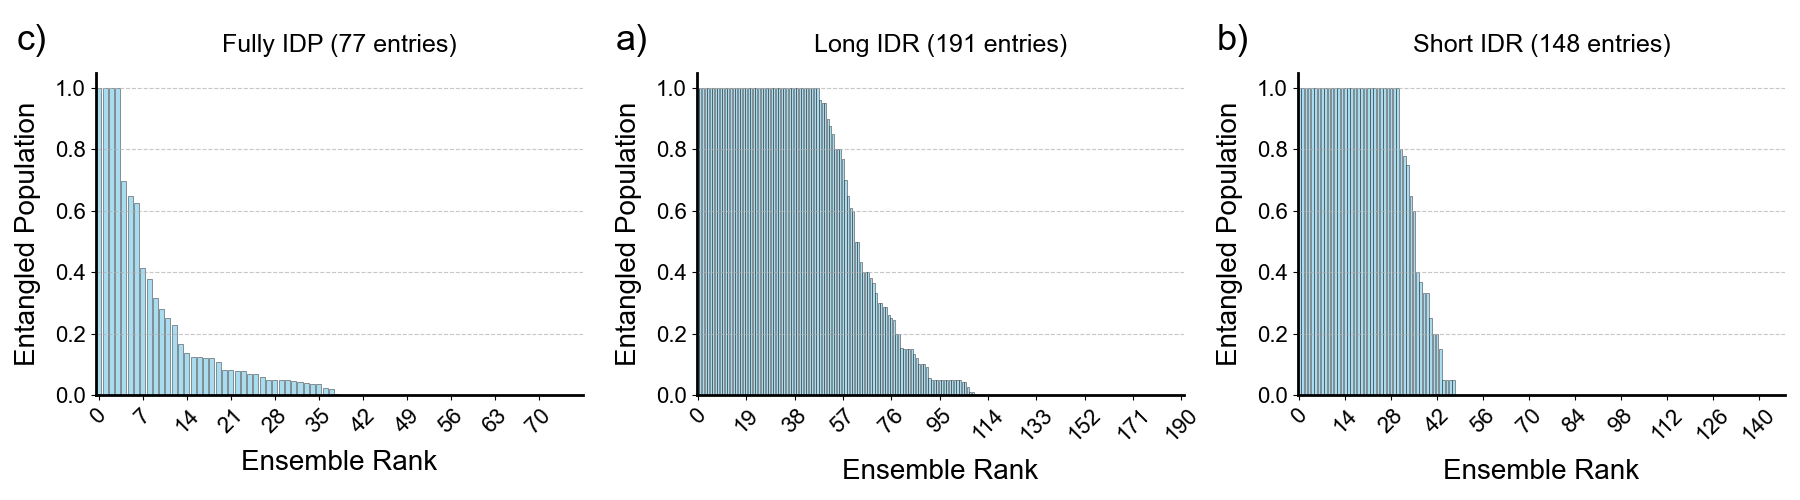

In [28]:
# import matplotlib.pyplot as plt
fc = 1
# Define figure with 3 panels
fig, axes = plt.subplots(1, 3, figsize=(18*fc, 5*fc))  # 1 row, 3 columns

# Define datasets and titles
datasets = [
    ("Fully IDP", fully_IDP_sorted),
    ("Long IDR", long_IDR_sorted),
    ("Short IDR", short_IDR_sorted),
]


# Matplotlib settings for publication-quality plots
base_fontsize = 16
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
panels = ['c)', 'a)', 'b)']
# Loop over datasets and create bar plots
for ax, (title, data), pan in zip(axes, datasets, panels):
    ax.bar(
        range(len(data.index)), data["entangled_population"],
        color='skyblue',
        edgecolor='black',
        linewidth=0.4,  # Thin edge lines
        width=0.8,  # Slightly reduce bar width
        alpha=0.7  # Add transparency
    )
    
    # Reduce space between bars and y-axis
    ax.set_xlim(-0.5, len(data.index))
    
    # Axis labels
    ax.set_xlabel("Ensemble Rank", fontsize=base_fontsize + 4, labelpad=10)
    ax.set_ylabel("Entangled Population", fontsize=base_fontsize + 4, labelpad=10)
    
    # Title
    ax.set_title(f"{title} ({len(data)} entries)", fontsize=base_fontsize + 2, pad=15)
    
    # Customize x-axis ticks
    ax.set_xticks(range(0, len(data.index), max(1, len(data) // 10)))  # Adjust based on dataset size
    ax.set_xticklabels(data.index[::max(1, len(data) // 10)], fontsize=base_fontsize, rotation=45, ha="center")
    
    # Customize y-axis ticks
    ax.tick_params(axis='y', labelsize=base_fontsize)
    
    # Add gridlines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remove top and right borders
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Make remaining borders thicker
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    
    ax.text(-0.1, 1.15, pan, transform=ax.transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Save and display the figure
plt.savefig(f'PED_ensemble.png', dpi=600, bbox_inches='tight')
plt.show()


<IPython.core.display.Javascript object>


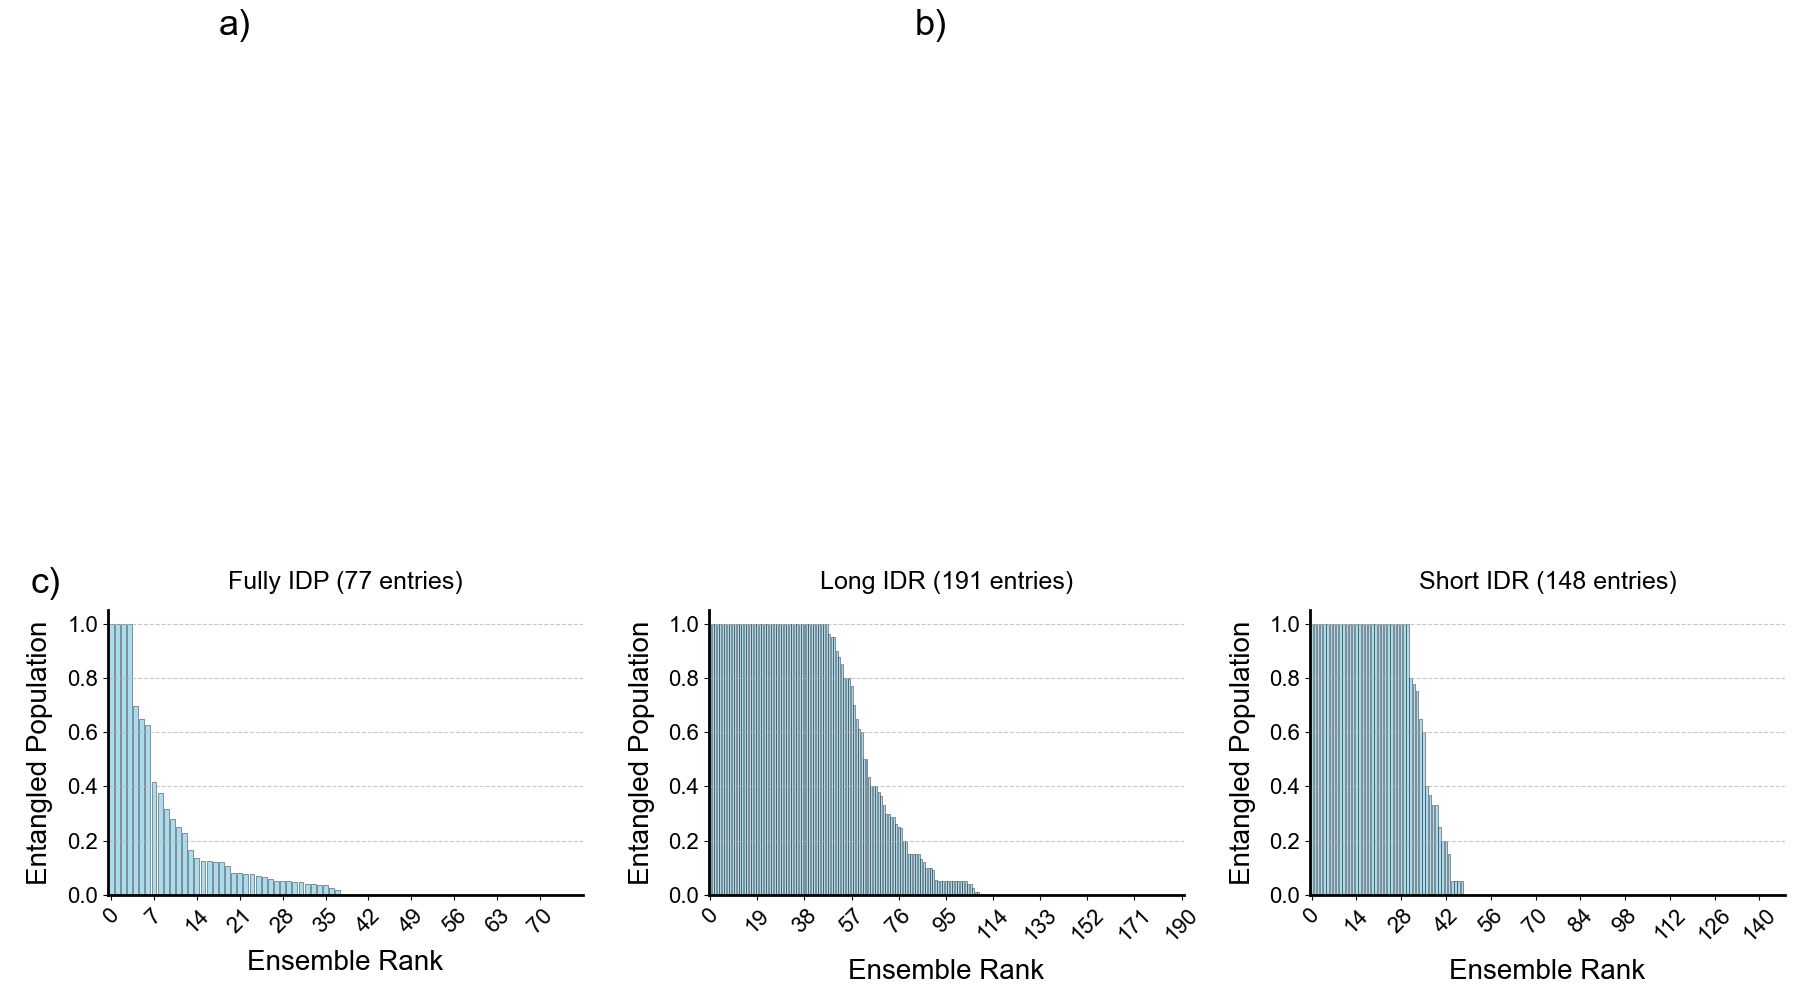

In [40]:
# import matplotlib.pyplot as plt
# Matplotlib settings for publication-quality plots
base_fontsize = 16
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
# Scaling factor
fc = 1

# Define figure with 4 rows: 1 row for the manual image insert, 3 rows for the plots
fig, axes = plt.subplots(2, 3, figsize=(18 * fc, 10 * fc), gridspec_kw={'height_ratios': [2.5, 1.5]})  

# Remove the second panel in the first row (axes[0, 2]) for proper layout
axes[0, 2].axis("off")

# Manually label the placeholders in the first row
axes[0, 0].axis("off")  # Hide axes for manual image placement
axes[0, 1].axis("off")  # Hide axes for manual image placement

axes[0, 0].text(0.3, 1.15, "a)", fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')
axes[0, 1].text(0.5, 1.15, "b)", fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')

# Define datasets and titles
datasets = [
    ("Fully IDP", fully_IDP_sorted),
    ("Long IDR", long_IDR_sorted),
    ("Short IDR", short_IDR_sorted),
]


panels = ['c)', ' ', '']

# Loop over datasets and create bar plots in the second row
for ax, (title, data), pan in zip(axes[1, :], datasets, panels):
    ax.bar(
        range(len(data.index)), data["entangled_population"],
        color='skyblue',
        edgecolor='black',
        linewidth=0.4,  # Thin edge lines
        width=0.8,  # Slightly reduce bar width
        alpha=0.7  # Add transparency
    )
    
    # Reduce space between bars and y-axis
    ax.set_xlim(-0.5, len(data.index))
    
    # Axis labels
    ax.set_xlabel("Ensemble Rank", fontsize=base_fontsize + 4, labelpad=10)
    ax.set_ylabel("Entangled Population", fontsize=base_fontsize + 4, labelpad=10)
    
    # Title
    ax.set_title(f"{title} ({len(data)} entries)", fontsize=base_fontsize + 2, pad=15)
    
    # Customize x-axis ticks
    ax.set_xticks(range(0, len(data.index), max(1, len(data) // 10)))  # Adjust based on dataset size
    ax.set_xticklabels(data.index[::max(1, len(data) // 10)], fontsize=base_fontsize, rotation=45, ha="center")
    
    # Customize y-axis ticks
    ax.tick_params(axis='y', labelsize=base_fontsize)
    
    # Add gridlines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remove top and right borders
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Make remaining borders thicker
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    
    ax.text(-0.1, 1.15, pan, transform=ax.transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Save and display the figure
plt.savefig('PED_ensemble_with_top_row.png', dpi=600, bbox_inches='tight')
plt.show()
